In [1]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *
from scipy.stats import pearsonr 

In [2]:
data=pd.read_csv(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_june.csv")
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,01-Jun,7723,198372,3882,95744,201,5607
1,02-Jun,8812,207187,4531,100275,222,5829
2,03-Jun,9689,216876,3789,104064,259,6088
3,04-Jun,9847,226723,4390,108454,274,6362
4,05-Jun,9472,236195,4770,113224,286,6648


In [3]:
def chk_dirt(dt):
    drt_cnt=0
    if(len(dt.columns)):
        for i in list(dt.columns):
            if((True== "NaN" in dt[i])or (True == "" in dt[i]) or (True == " " in dt[i]) or (True == "?" in  dt[i])or (True == "####" in dt[i])):
                drt_cnt+=1
        if(drt_cnt):
            print("Unwanted Data Value Found")
    else:
        print("No Columns available to deal with or columns mixed with rows")

chk_dirt(data)

In [4]:
data[data.duplicated()]

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased


In [5]:
data.dtypes

Date               object
Daily Confirmed     int64
Total Confirmed     int64
Daily Recovered     int64
Total Recovered     int64
Daily Deceased      int64
Total Deceased      int64
dtype: object

In [6]:
data.ndim

2

In [7]:
data.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,13171.533333,365454.333333,8532.600000,197476.333333,400.166667,11070.133333
std,3660.241397,116139.450829,3403.180131,77843.656903,311.518758,3852.279878
min,7723.000000,198372.000000,3789.000000,95744.000000,201.000000,5607.000000
25%,10126.000000,268516.250000,5483.250000,130427.500000,288.750000,7545.000000
50%,11722.000000,348618.000000,7725.000000,183937.000000,350.500000,10920.000000
75%,15852.500000,452206.000000,10844.500000,255984.500000,399.750000,14367.000000
max,20142.000000,585795.000000,14229.000000,347840.000000,2004.000000,17411.000000


In [8]:
###beginning the task of analysis(visually and quantitatively )

In [9]:
pcol=['Daily Confirmed','Daily Recovered','Daily Deceased']
tcol=['Total Confirmed','Total Recovered','Total Deceased']

In [10]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            a=len(data)*(np.sum(data[pcol[j]]*data[pcol[k]]))
            b=np.sum(data[pcol[j]])
            c=np.sum(data[pcol[k]])
            d=len(data)*np.sum(data[pcol[j]]**2)
            e=b**2
            f=len(data)*np.sum(data[pcol[k]]**2)
            g=c**2
            r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
            
            print(pcol[j])
            if(k!=3):
                print(pcol[k])
            else:
                print(pcol[k-2])
                
            print(r)
            k=k+1
    else:
        a=len(data)*(np.sum(data[pcol[i]]*data[pcol[i+1]]))
        b=np.sum(data[pcol[i]])
        c=np.sum(data[pcol[i+1]])
        d=len(data)*np.sum(data[pcol[i]]**2)
        e=b**2
        f=len(data)*np.sum(data[pcol[i+1]]**2)
        g=c**2
        k=j+2
        r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
        print(pcol[i])
        print(pcol[i+1])
        print(r)
        
            

Daily Confirmed
Daily Recovered
1.4265227339504927e-09
Daily Confirmed
Daily Deceased
6.972123989900713e-11
Daily Recovered
Daily Deceased
1.062070372737624e-10


<ipython-input-10-e405aa859196>:13: RuntimeWarning: overflow encountered in longlong_scalars
  r=((a)-(b*c))/(((d)-(e))*((f)-(g)))


In [11]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            coef,pval=pearsonr(data[pcol[j]],data[pcol[k]])
            print(pcol[j]+" Vs."+pcol[k])
            print(coef)
            print(pval)
            k=k+1
    else:
        coef,pval=pearsonr(data[pcol[i]],data[pcol[i+1]])
        print(pcol[i]+" Vs."+pcol[i+1])
        print(coef)
        print(pval)

Daily Confirmed Vs.Daily Recovered
0.8901977596719889
4.580768181420663e-11
Daily Confirmed Vs.Daily Deceased
0.06916371079593994
0.7164825692815726
Daily Recovered Vs.Daily Deceased
0.09795840086740568
0.606564717955844


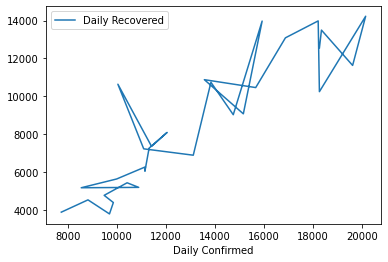

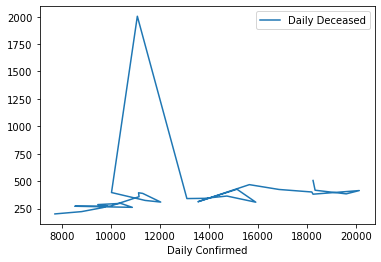

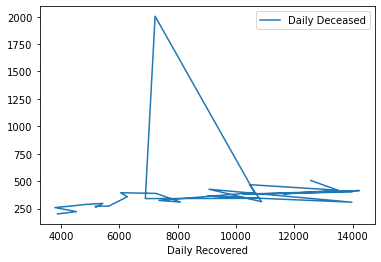

In [12]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            data.plot(x=pcol[j],y=pcol[k])
            k=k+1
    else:
        data.plot(x=pcol[i],y=pcol[i+1])

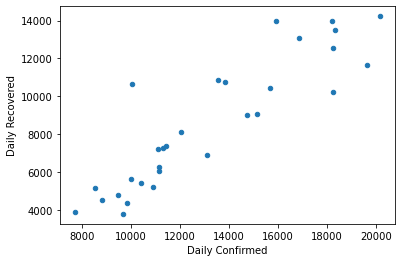

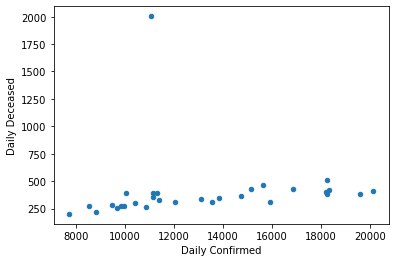

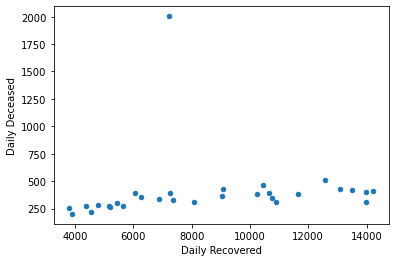

In [13]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            data.plot(x=pcol[j],y=pcol[k],kind="scatter")
            k=k+1
    else:
        data.plot(x=pcol[i],y=pcol[i+1],kind="scatter")

In [14]:
for i in range(len(tcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(tcol)):
            a=len(data)*(np.sum(data[tcol[j]]*data[tcol[k]]))
            b=np.sum(data[tcol[j]])
            c=np.sum(data[tcol[k]])
            d=len(data)*np.sum(data[tcol[j]]**2)
            e=b**2
            f=len(data)*np.sum(data[tcol[k]]**2)
            g=c**2
            r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
            
            print(tcol[j])
            if(k!=3):
                print(tcol[k])
            else:
                print(tcol[k-2])
                
            print(r)
            k=k+1
    else:
        a=len(data)*(np.sum(data[tcol[i]]*data[tcol[i+1]]))
        b=np.sum(data[tcol[i]])
        c=np.sum(data[tcol[i+1]])
        d=len(data)*np.sum(data[tcol[i]]**2)
        e=b**2
        f=len(data)*np.sum(data[tcol[i+1]]**2)
        g=c**2
        k=j+2
        r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
        print(tcol[i])
        print(tcol[i+1])
        print(r)
        
            

Total Confirmed
Total Recovered
1.1079506424983933e-06
Total Confirmed
Total Deceased
9.073957476430301e-08
Total Recovered
Total Deceased
-6.451065766421204e-08


<ipython-input-14-2344589cd845>:13: RuntimeWarning: overflow encountered in longlong_scalars
  r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
<ipython-input-14-2344589cd845>:32: RuntimeWarning: overflow encountered in longlong_scalars
  r=((a)-(b*c))/(((d)-(e))*((f)-(g)))


In [15]:
for i in range(len(tcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(tcol)):
            coef,pval=pearsonr(data[tcol[j]],data[tcol[k]])
            print(tcol[j]+" Vs."+tcol[k])
            print(coef)
            print(pval)
            k=k+1
    else:
        coef,pval=pearsonr(data[tcol[i]],data[tcol[i+1]])
        print(tcol[i]+" Vs."+tcol[i+1])
        print(coef)
        print(pval)

Total Confirmed Vs.Total Recovered
0.998565450393019
3.79438448828994e-37
Total Confirmed Vs.Total Deceased
0.9889534433658843
9.223703151812044e-25
Total Recovered Vs.Total Deceased
0.986661497061202
1.2739615447836433e-23


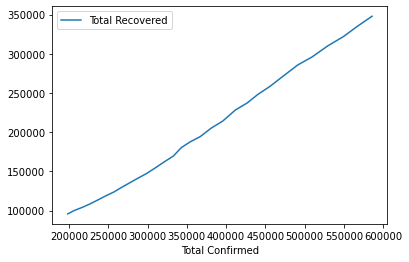

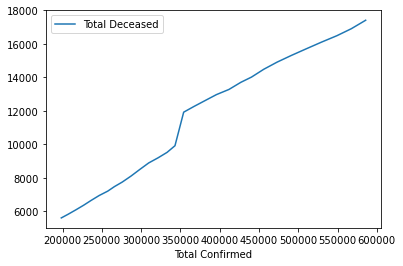

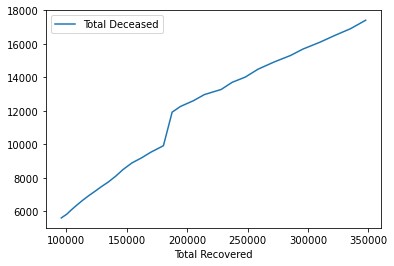

In [16]:
for i in range(len(tcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(tcol)):
            data.plot(x=tcol[j],y=tcol[k])
            k=k+1
    else:
        data.plot(x=tcol[i],y=tcol[i+1])

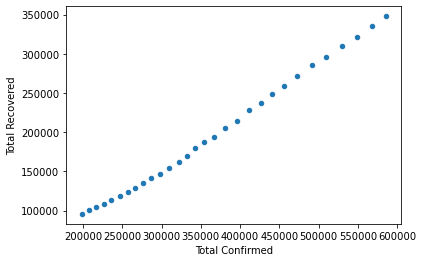

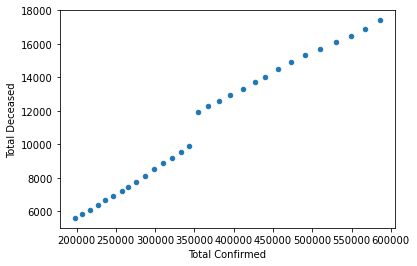

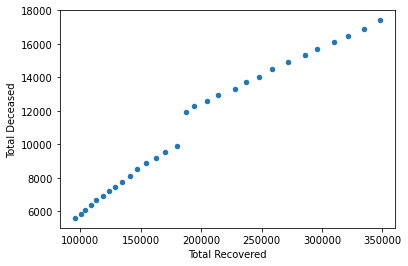

In [17]:
for i in range(len(tcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(tcol)):
            data.plot(x=tcol[j],y=tcol[k],kind="scatter")
            k=k+1
    else:
        data.plot(x=tcol[i],y=tcol[i+1],kind="scatter")

In [18]:
colls=list(data.columns)
colls.pop(0)
for c in colls:
    min(data[c])
    max(data[c])
    rnge_list=[]
    dys_cnt={}
    
    for i in range(1,len(str(max(data[c])))):
        rnge_list.append(10**i)
    cnt1=0

    for i in list(data[c]):

        if(len(str(i))<2 or len(str(i))==2):
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[0]):cnt1})
        else:
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[len(str(i))-2]):cnt1})

    if(len(list(dys_cnt.keys()))>1):
        itr_lst=list(range(1,len(list(dys_cnt.keys()))))
        itr_lst.sort(reverse=True)
        for i in itr_lst:
            dys_cnt[list(dys_cnt.keys())[i]]=dys_cnt[list(dys_cnt.keys())[i]]-dys_cnt[list(dys_cnt.keys())[i-1]]        

    print("For: "+c)
    print(pd.DataFrame(dys_cnt,index=[0]))
    print("\n")
    

For: Daily Confirmed
   1000  10000
0     9     21


For: Total Confirmed
   100000
0      30


For: Daily Recovered
   1000  10000
0    21      9


For: Total Recovered
   10000  100000
0      1      29


For: Daily Deceased
   100  1000
0   30   -14


For: Total Deceased
   1000  10000
0    15     15




In [19]:
colls=list(data.columns)
colls.pop(0)
for c in colls:
    min(data[c])
    max(data[c])
    rnge_list=[]
    dys_cnt={}

    for i in range(1,len(str(max(data[c])))):
        rnge_list.append(10**i)
    cnt1=0


    for i in list(data[c]):

        if(len(str(i))<2 or len(str(i))==2):
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[0]):cnt1})
        else:
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[len(str(i))-2]):cnt1})

            

    print("For: "+c)
    print(pd.DataFrame(dys_cnt,index=[0]))
    print("\n")
    

For: Daily Confirmed
   1000  10000
0     9     30


For: Total Confirmed
   100000
0      30


For: Daily Recovered
   1000  10000
0    21     30


For: Total Recovered
   10000  100000
0      1      30


For: Daily Deceased
   100  1000
0   30    16


For: Total Deceased
   1000  10000
0    15     30


